# Data Analysis of Hospital Encounters for Behavioral Health

> Abby Zurasky

## Introduction:

#### This dataset contains counts of inpatient hospitalizations and emergency department visits for patients with Behavioral Health Disorders

## Required Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### The config magic command is used to set high resolution figures.

In [9]:
%config InlineBackend.figure_format = 'retina'

### Data Import

In [15]:
# Import the spreadsheet and assign it to the variable df
df = pd.read_csv('hospitalencountersforbehavioralhealth.csv')

### Verification of Data

In [14]:
# Print the first few rows of the DataFrame
print(df.head())

   Year  Geography    Pattype     Category        Cat_desc  \
0  2020  Statewide  Inpatient  DX Category  All Discharges   
1  2020  Statewide  Inpatient  DX Category  All Discharges   
2  2020  Statewide  Inpatient  DX Category  All Discharges   
3  2020  Statewide  Inpatient  DX Category  All Discharges   
4  2020  Statewide  Inpatient          Sex          Female   

                   Dxgroup    Count      Total    Percent  
0      All Other Diagnoses  2299697  3444532.0  66.763700  
1    Co-Occuring Disorders   292114  3444532.0   8.480513  
2  Mental Health Disorders   523853  3444532.0  15.208249  
3  Substance Use Disorders   328868  3444532.0   9.547538  
4      All Other Diagnoses  1319139  1874686.0  70.365864  


In [13]:
# Print the columns of the DataFrame
print(df.columns)

Index(['Year', 'Geography', 'Pattype', 'Category', 'Cat_desc', 'Dxgroup',
       'Count', 'Total', 'Percent'],
      dtype='object')


## Relational Plots

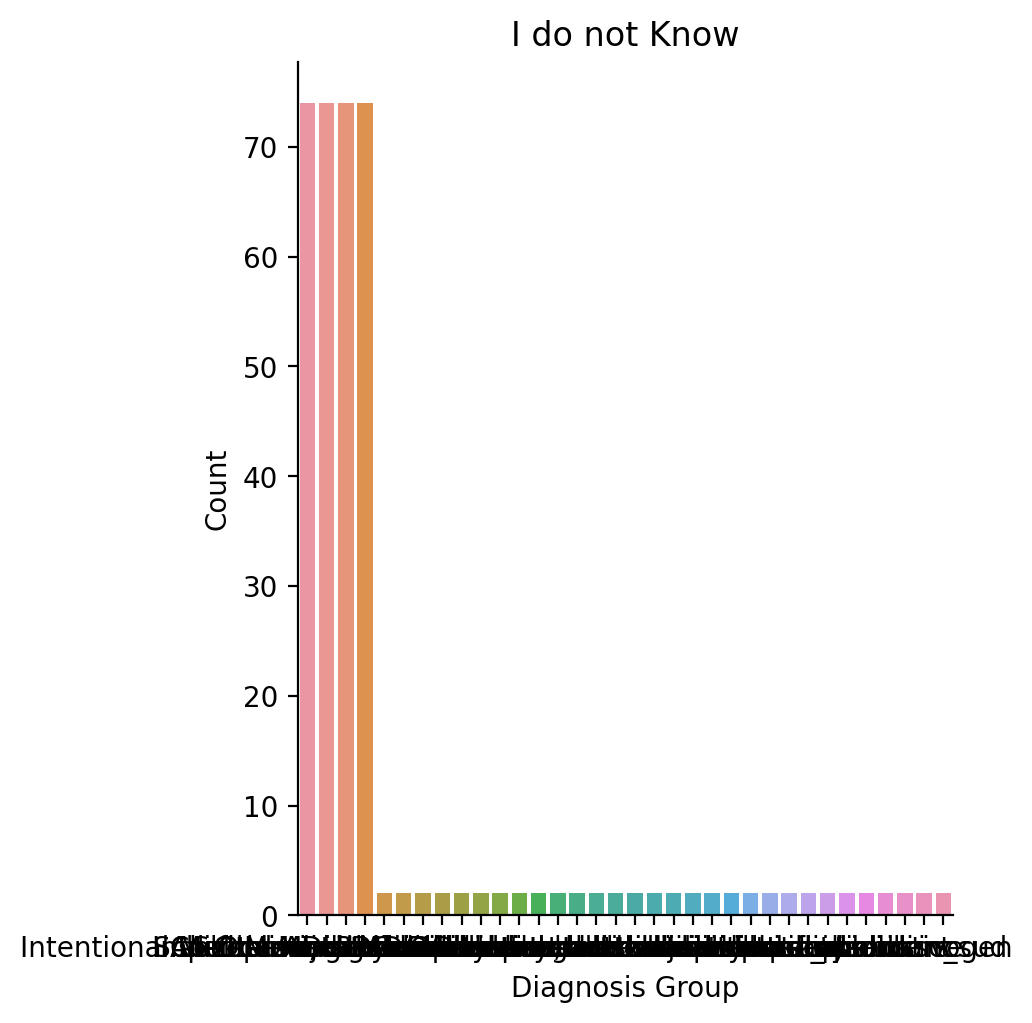

In [32]:
sns.catplot(
    data=df,
    x='Dxgroup',
    kind='count'
).set(
    title='I do not Know',
    xlabel='Diagnosis Group',
    ylabel='Count'
)
